In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fraud_data=pd.read_csv('payment_fraud.csv')

In [3]:
fraud_data.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0


In [4]:
fraud_data.isnull().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
label                   0
dtype: int64

In [5]:
fraud_data['label'].unique()

array([0, 1], dtype=int64)

In [6]:
import warnings
warnings.filterwarnings('ignore')

Text(0, 0.5, 'Count')

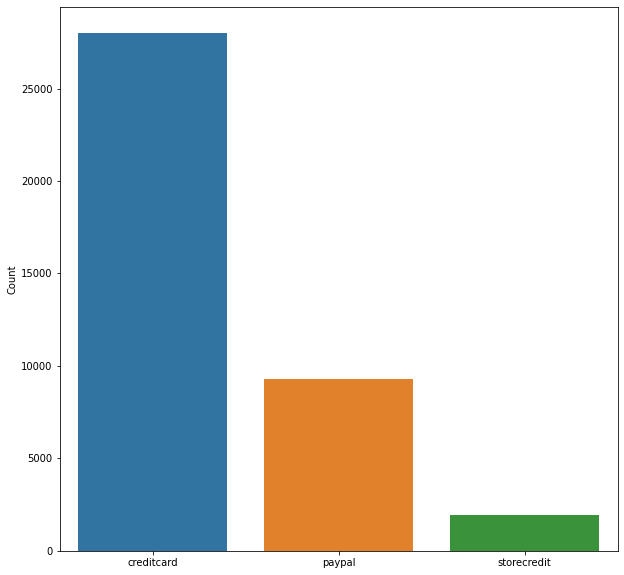

In [7]:
pay=fraud_data['paymentMethod'].value_counts()
plt.figure(figsize=(10,10))
sns.barplot(pay.index,pay)
plt.ylabel('Count')

In [8]:
fraud_data['label'].value_counts()

0    38661
1      560
Name: label, dtype: int64

<AxesSubplot:ylabel='label'>

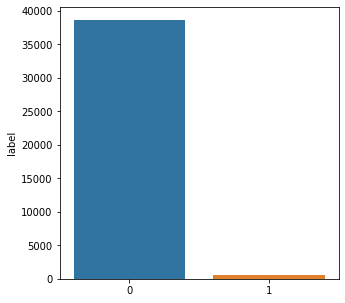

In [9]:
plt.figure(figsize=(5,5))
sns.barplot(fraud_data['label'].value_counts().index,fraud_data['label'].value_counts())

In [10]:
paymthd_label = {v:k for k, v in enumerate(fraud_data.paymentMethod.unique())}

fraud_data.paymentMethod = fraud_data.paymentMethod.map(paymthd_label)

In [11]:
fraud_data.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,0,28.204861,0
1,725,1,4.742303,1,0.000000,0
2,845,1,4.921318,2,0.000000,0
3,503,1,4.886641,2,0.000000,0
4,2000,1,5.040929,2,0.000000,0


<AxesSubplot:>

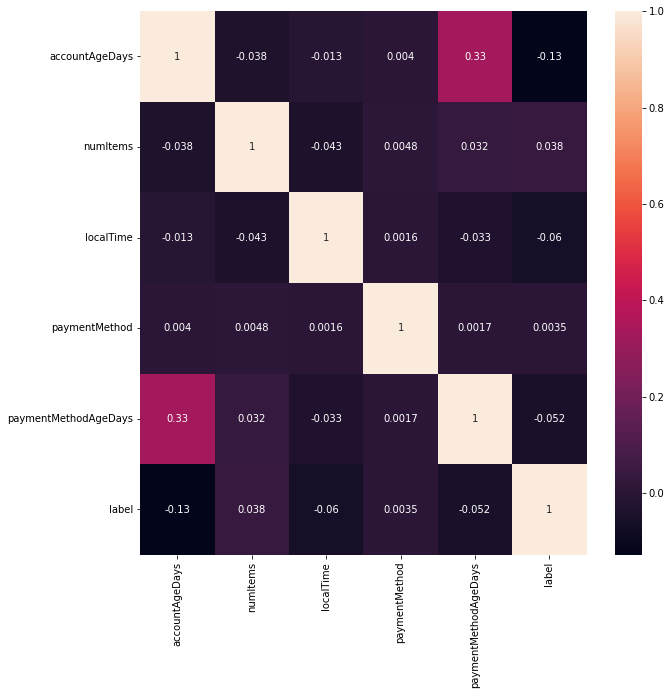

In [12]:
plt.figure(figsize=(10, 10))
sns.heatmap(fraud_data.corr(), annot=True)

In [13]:
fraud_data.describe()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
count,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000
mean,857.563984,1.084751,4.748232,1.476811,122.641326,0.014278
std,804.788212,0.566899,0.389360,0.850805,283.569177,0.118636
min,1.000000,1.000000,0.421214,0.000000,0.000000,0.000000
25%,72.000000,1.000000,4.742303,1.000000,0.000000,0.000000
50%,603.000000,1.000000,4.886641,2.000000,0.012500,0.000000
75%,1804.000000,1.000000,4.962055,2.000000,87.510417,0.000000
max,2000.000000,29.000000,5.040929,2.000000,1999.580556,1.000000


In [14]:
X = fraud_data.iloc[:, :-1].values
y = fraud_data.iloc[:, -1].values

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [18]:
## train test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (29415, 5)
X_test shape:  (9806, 5)
y_train shape:  (29415,)
y_test shape:  (9806,)


In [21]:
## logisticRegression Model
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

## training
lg.fit(X_train, y_train)

LogisticRegression()

In [22]:
pred = lg.predict(X_test)


In [23]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

----------------------------------------------------Accuracy------------------------------------------------------
0.9855190699571691

---------------------------------------------------Classification Report---------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9664
           1       0.00      0.00      0.00       142

    accuracy                           0.99      9806
   macro avg       0.49      0.50      0.50      9806
weighted avg       0.97      0.99      0.98      9806


-------------------------------------------------Confustion Metrics----------------------------------------------------


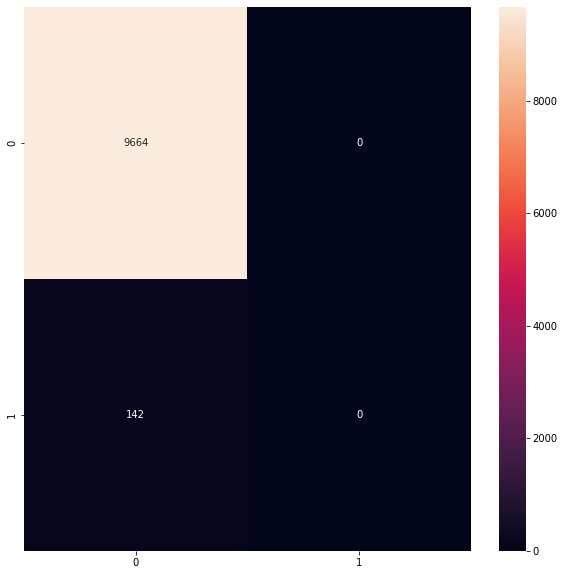

In [24]:
print("----------------------------------------------------Accuracy------------------------------------------------------")
print(accuracy_score(y_test, pred))
print()

print("---------------------------------------------------Classification Report---------------------------------------------")
print(classification_report(y_test, pred))
print()

print("-------------------------------------------------Confustion Metrics----------------------------------------------------")
plt.figure(figsize=(10, 10));
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');